In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

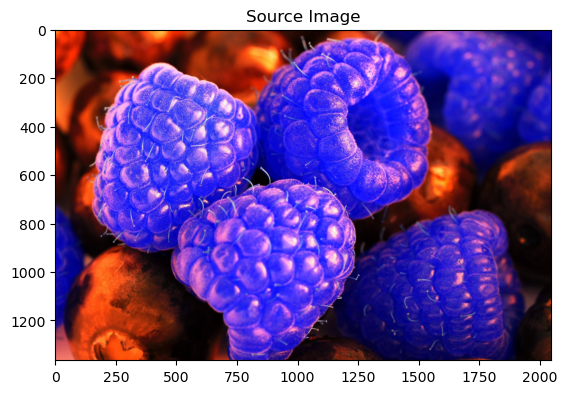

In [2]:
# Загрузка изображения
path = "E:\\ant5Image.jpg"
image = cv2.imread(path)
plt.title('Source Image')
plt.imshow(image)
plt.show()

In [3]:
# сегментаци изображений
# расширение регионов
def region_growingHSV(image, seed, threshold):
    # Create an empty binary mask to store the segmented region
    region_mask = np.zeros(image.shape[0:2], dtype=np.uint8)
    
    # Define the connectivity (4-connectivity in this case)
    connectivity = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    # Create a queue to store the pixels to be processed
    queue = []
    
    for i in seed:
        # Get the seed coordinates
        seed_x, seed_y = i
        queue.append((seed_x, seed_y)) 

        # Perform region growing
        while len(queue) > 0:
            x, y = queue.pop(0)
            
            # Check if the pixel is within the image boundaries
            if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1]:
                continue
            
            # Check if the pixel has already been visited
            if region_mask[x, y] != 0:
                continue
            
            # Calculate the similarity measure
            similarity = sum(abs(image[x, y, :] - image[seed_x, seed_y, :]))/3
            
            # Check if the pixel is similar to the seed pixel
            if similarity < threshold:
                region_mask[x, y] = 255  # Add the pixel to the region
                # Add the neighbors to the queue for further processing
                for dx, dy in connectivity:
                    queue.append((x + dx, y + dy))
    
    return region_mask

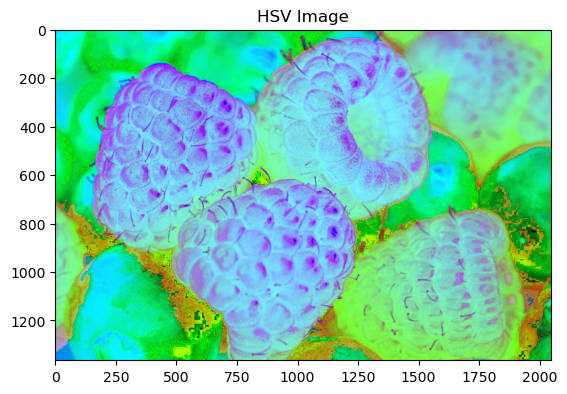

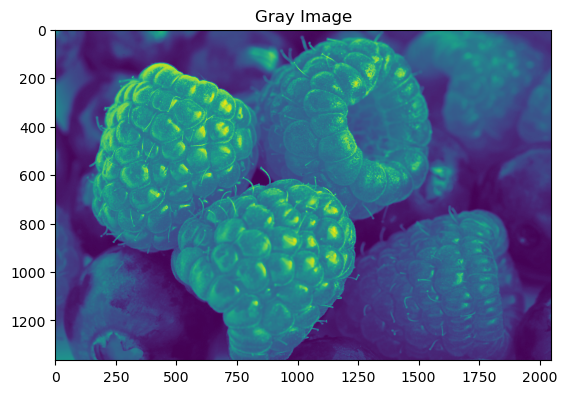

In [4]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title('HSV Image')
plt.imshow(image_hsv)
plt.show()
plt.title('Gray Image')
plt.imshow(gray_image)
plt.show()

In [ ]:
img_clone = image.copy()

# определяем координаты начальных точек
seeds = [(500, 500), (950, 50), (400, 500), (400, 1100), (500, 1850), (400, 1300)]

# координаты для графика
x = list(map(lambda x: x[1], seeds))
y = list(map(lambda x: x[0], seeds))

# порог похожести цвета региона
threshold = 100

# находим сегментацию используя метод region_growingHSV
segmented_region = region_growingHSV(image_hsv, seeds, threshold)

# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result = cv2.bitwise_and(img_clone, img_clone, mask=segmented_region)

# отображаем полученное изображение
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.scatter(x, y, marker="x", color="black", s=200)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cv2.imwrite("ResultImage.jpg", result)